# <center> Research Methodology 


## <center> Assignment No. 8

### Ques. Curve fitting and error analysis

In [1]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [18]:
# set_nb_theme('grade3')

<p style="font-size:14px">Curve fitting is the process of creating a curve, or mathematical function, that best fits a set of data points, possibly subject to constraints. Curve fitting can involve either interpolation, which requires an exact fit to the data, or smoothing, which involves creating a ”smooth” function that approximates fits the data. We do curve fitting for better visualization of data and to predict something how the data will behave in the future.</p> <br>
<p style="font-size:14px">Regression analysis is primarily done with two main
goals in mind. Firstly regression analysis is to do prediction and forecasting and secondly it is done to find relationship
between dependent and independent variables.  There are many types of regression techniques which one can follow, as linear
regression, logistic regression, polynomial regression to name a few.</p>


### Root Mean Square Error

The standard deviation of the residuals is defined as the Root Mean Square Error (RMSE) (prediction errors). Residuals are a measure of how far away the data points are from the regression line; RMSE is a measure of how spread out these residuals are. In other words, it indicates how concentrated the data is near the line of best fit. To validate experimental results, root mean square error is commonly used in climatology, forecasting, and regression analysis.

### Chi-Squared Test

A chi-squared test is a statistical hypothesis test that is valid when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof. Pearson's chi-squared test is used to determine whether there is a statistically significant difference in one or more categories of a contingency table between expected and observed frequencies.

### Methodology

<ol>
<li>Load the dataset
<li>Plot the graph
<li>fit the curve
<li>Calculating the RMSE and Chi square
</ol>

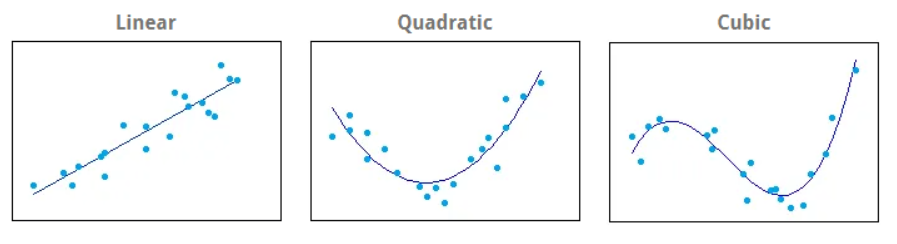

#### Importing required librarires: 

In [3]:
import jovian
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import math

#### Loading Datasets: 
<a href = "https://docs.google.com/spreadsheets/u/3/d/1OPtTJNzrxwLhn3qfDM0EKwsk8_k56RWvxBdTJMNhZwE/edit?usp=drive_web&ouid=105078607789380485504">DataSet 1</a> <br>
<a href = "https://docs.google.com/spreadsheets/d/1psuEFgIJrEjrTdboZy8r7w6nw1tdAAfhdw0P1SZ92Lc/edit#gid=1899705032">DataSet 2</a>

In [4]:
x = np.loadtxt( 'D:/Amths/data1.csv', unpack= True)
y = np.loadtxt( 'D:/Amths/data2.csv', unpack= True)

#### Values in the DataSets

In [5]:
x

array([  499.03,   235.79,   819.82, ..., 10466.  , 10782.  , 10647.  ])

In [6]:
y

array([4.27e+06, 7.56e+06, 4.50e+06, ..., 1.09e+08, 1.02e+08, 1.02e+08])

#### Plotting a Graph using the above datasets

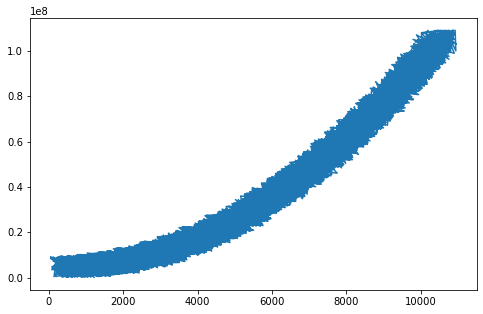

In [7]:
plt.figure(figsize = (8, 5))
plt.plot(x,y)
plt.show()

## Curve fitting

### Regression line fitting

Generally, one fits a function of the form y = f(x). The first degree polynomial equation for this function is a line with slope a and is represented as. y = ax + b
Here, we are trying to fit a straight line on our data set and calculating the Root mean square error(RMSE) and chi square.
We are fitting the curve using the objective function and then we unpack the values that we get from the function.
Plot the Graph and its equation, and then we calculate the Root mean square error and the chi square error.

y = 9897.55606 * x + -16126391.94457


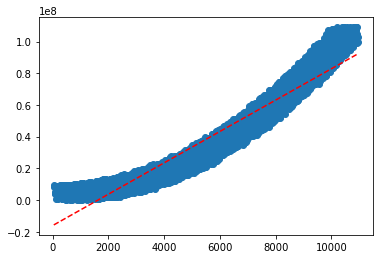

In [8]:
def objective(x, a, b):
	return a * x + b
 
popt, _ = curve_fit(objective, x, y)
#unpacking the values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

plt.scatter(x, y)

x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [9]:
rmse = 0
n = len(x)
for i in range(n):
    y_pred = b + a * x[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("Root Mean Square Error is: ") 
rmse

Root Mean Square Error is: 


8441373.340379164

In [10]:
chisq1 = sum((y - objective(x, a, b))**2/y**2)
chisq1

37973.19301011763

Here, we are trying to fit a quadratic curve to the graph and calculate the RMSE and chi square.

y = -471.31388 * x + 0.94173 * x^2 + 4487112.98810


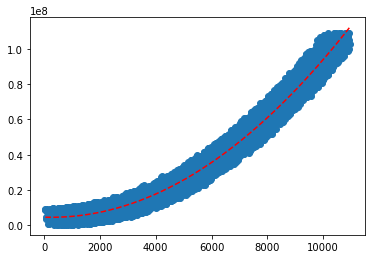

In [11]:


def objective(x, a, b, c):
	return a * x + b * x**2 + c
#unpacking the values
popt, _ = curve_fit(objective, x, y)

a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
plt.scatter(x, y)

x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [12]:
rmse = 0
n = len(x)
for i in range(n):
    y_pred = a * x[i] + b * x[i]**2 + c
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("Root Mean Square Error is: ") 
rmse

Root Mean Square Error is: 


4367521.775937688

In [13]:
chisq = sum((y - objective(x,a,b,c))**2/y**2)
chisq

10326.514478729936

Here, we are fitting 5th power curve to our graph and observing the changes in RMSE and chi square values.

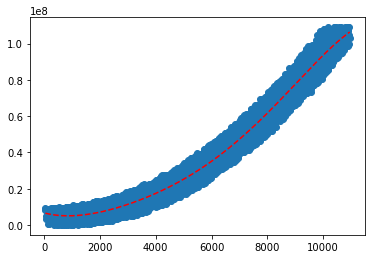

In [14]:
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 

popt, _ = curve_fit(objective, x, y)

a, b, c, d, e, f = popt

plt.scatter(x, y)
x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [15]:
rmse = 0
n = len(x)
for i in range(n):
    y_pred = (a * x[i]) + (b * x[i]**2) + (c * x[i]**3) + (d * x[i]**4) + (e * x[i]**5) + f
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("Root Mean Square Error is: ")  
rmse

Root Mean Square Error is: 


4309881.187009732

In [16]:
chisq = sum((y - objective(x, a, b, c, d, e, f))**2/y**2)
chisq

11897.742360251064

### Conclusion

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sagarankit13/rm-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sagarankit13/rm-assignment


'https://jovian.ai/sagarankit13/rm-assignment'